In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
chess = pd.read_csv('chessTrimmed.csv')

# Creating a model with ratings, turns and victory_status

In [3]:
x = chess[['black_rating', 'white_rating', 'turns', 'victory_statusR']]
y = chess['winnerR']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [5]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)

RandomForestClassifier()

In [6]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[2191  777    0]
 [ 987 1803    0]
 [   5    9  246]]
              precision    recall  f1-score   support

           1       0.69      0.74      0.71      2968
           2       0.70      0.65      0.67      2790
           3       1.00      0.95      0.97       260

    accuracy                           0.70      6018
   macro avg       0.79      0.78      0.79      6018
weighted avg       0.71      0.70      0.70      6018



## A lot more accuracy than the model with only predictors known beforehand. 

## Tuning hyperparameters

In [7]:
from sklearn.model_selection import RandomizedSearchCV

In [8]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.6297773346626786
4 : 0.6583582585576604
5 : 0.6782984380192755
8 : 0.6748089066134929
10 : 0.6861083416417414
20 : 0.6954137587238285
50 : 0.7085410435360585
75 : 0.7057161847789963
100 : 0.707876370887338


## 100 is most accurate. Checking other parameters

In [9]:
max_features = ['auto', None, 'log2']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
min_samples_leaf = [1, 2, 4]
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

In [10]:
rf = RandomForestClassifier(n_estimators=100)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3)

In [11]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]})

In [12]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 80}

In [13]:
forest = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, max_features="auto", max_depth=80)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=2)

In [14]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[2198  770    0]
 [ 919 1871    0]
 [   5    9  246]]
              precision    recall  f1-score   support

           1       0.70      0.74      0.72      2968
           2       0.71      0.67      0.69      2790
           3       1.00      0.95      0.97       260

    accuracy                           0.72      6018
   macro avg       0.80      0.79      0.79      6018
weighted avg       0.72      0.72      0.72      6018



## Only slightly better than model before hyperparameter tuning. But I'll take it. 

## Checking feature importance

In [15]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

black_rating       0.279530
white_rating       0.286332
turns              0.251703
victory_statusR    0.182435
dtype: float64

## It looks like white's rating is the most significant predictor, with black rating close behind. 

## Plotting feature importance

C:\Users\kelly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


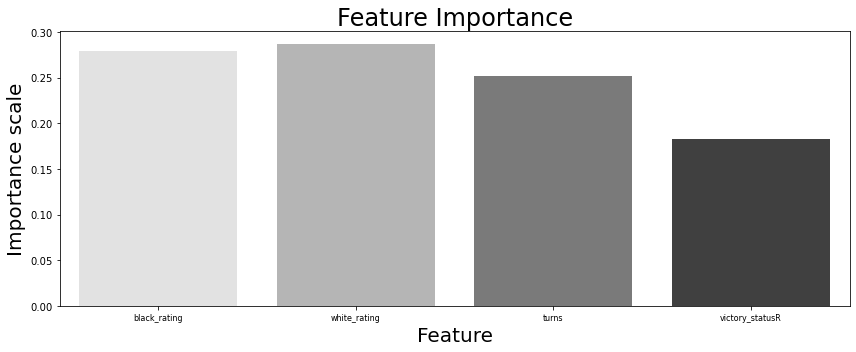

In [20]:
plt.figure(figsize=(12, 5))
plt.title('Feature Importance', fontsize=24)
plt.xlabel('Feature', fontsize=20)
plt.xticks(fontsize=8)
plt.ylabel('Importance scale', fontsize=20)
plt.yticks(fontsize=10)
sns.barplot(feature_importances.index, y=feature_importances.values, palette='Greys')
plt.tight_layout()
plt.show()